In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data

In [58]:
nodes = pd.read_csv("../data/large_synthetic_fog_nodes.csv")
tasks = pd.read_csv("../data/large_synthetic_tasks.csv")

nodes.info()
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Node_ID                       500 non-null    object 
 1   Processing_Power_GHz          500 non-null    float64
 2   Available_Memory_GB           500 non-null    int64  
 3   Energy_Consumption_Rate_J_ms  500 non-null    float64
 4   Network_Latency_ms            500 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 19.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Task_ID                    11000 non-null  object 
 1   Task_Length_MIns           11000 non-null  int64  
 2   Arrival_Time_s             11000 non-null  int64  
 3   Deadline_s                 

In [59]:
nodes.head()

,Node_ID,Processing_Power_GHz,Available_Memory_GB,Energy_Consumption_Rate_J_ms,Network_Latency_ms
0,N1,3.228483,89,0.328811,28
1,N2,1.615700,71,0.553022,32
2,N3,2.020780,70,0.231735,23
3,N4,1.806147,15,0.543662,14
4,N5,1.590314,58,0.680510,38


In [60]:
tasks.head()

,Task_ID,Task_Length_MIns,Arrival_Time_s,Deadline_s,Required_Computation_MIPS,Task_Allocation,Execution_Delay_ms,Energy_Consumption_J
0,T1,8189,178,38,4620,Cloud,2895.685833,1703.730027
1,T2,2937,693,125,2225,Cloud,934.965670,243.805511
2,T3,1486,372,124,3954,Cloud,835.975051,376.888729
3,T4,4687,279,76,4455,Cloud,1617.295452,1090.691451
4,T5,1447,13,13,4776,Fog,425.592142,248.998343


In [61]:
mapping = {'Cloud': 0, 'Fog': 1}
tasks['Task_Allocation'] = tasks['Task_Allocation'].map(mapping)

In [62]:
print(len(tasks.Task_ID.unique()))
print(len(nodes.Node_ID.unique()))

tasks = tasks.drop(columns=['Task_ID'])
nodes = nodes.drop(columns=['Node_ID'])

11000
500


In [63]:
nodes.info()
tasks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Processing_Power_GHz          500 non-null    float64
 1   Available_Memory_GB           500 non-null    int64  
 2   Energy_Consumption_Rate_J_ms  500 non-null    float64
 3   Network_Latency_ms            500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Task_Length_MIns           11000 non-null  int64  
 1   Arrival_Time_s             11000 non-null  int64  
 2   Deadline_s                 11000 non-null  int64  
 3   Required_Computation_MIPS  11000 non-null  int64  
 4   Task_Allocation            11000 non-null 

# EDA

/tmp/ipykernel_85701/156597107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="Blues")


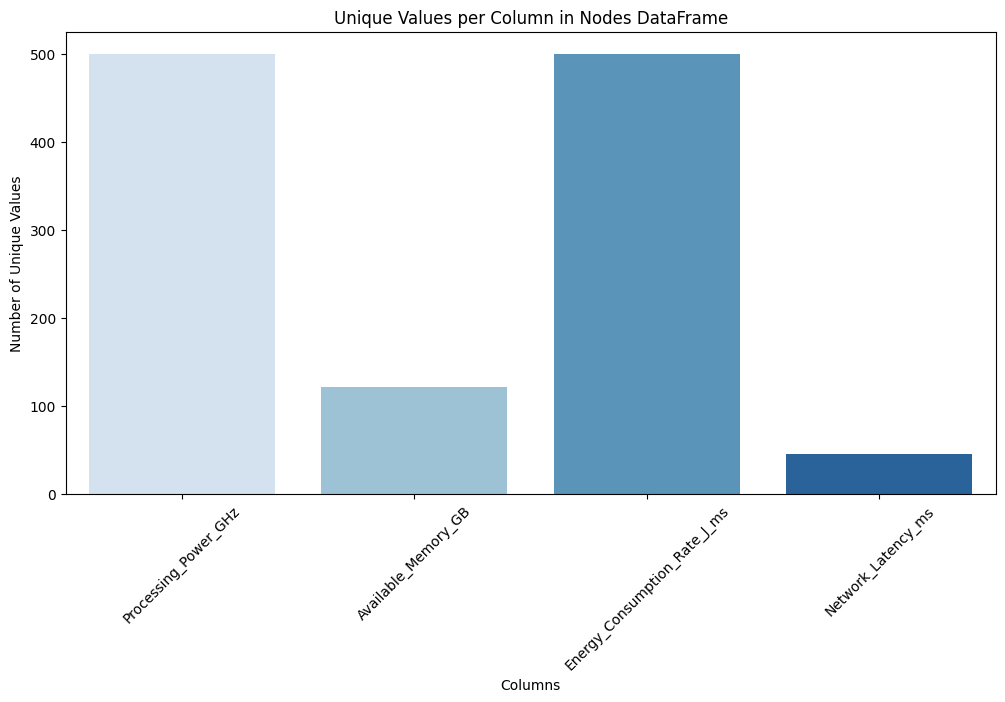

/tmp/ipykernel_85701/156597107.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="Blues")


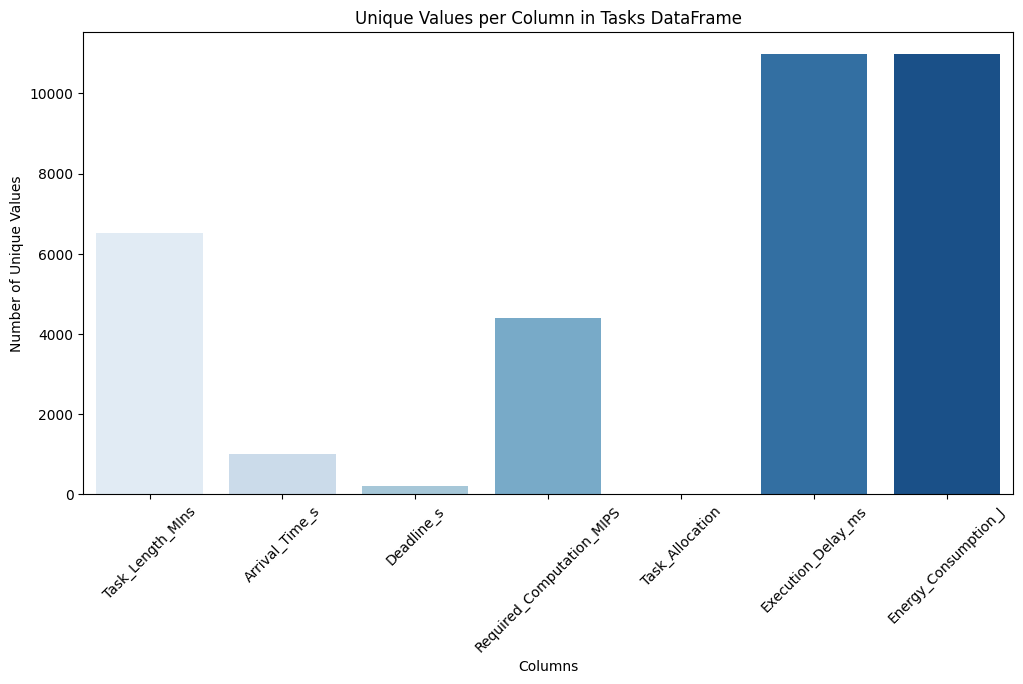

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to count unique values in each column
def plot_unique_values(df, title):
    unique_counts = df.nunique()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="Blues")
    plt.xlabel("Columns")
    plt.ylabel("Number of Unique Values")
    plt.title(title)
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.show()

# Plot for Nodes DataFrame
plot_unique_values(nodes, "Unique Values per Column in Nodes DataFrame")

# Plot for Tasks DataFrame
plot_unique_values(tasks, "Unique Values per Column in Tasks DataFrame")


### Pierson Correlations in Tasks

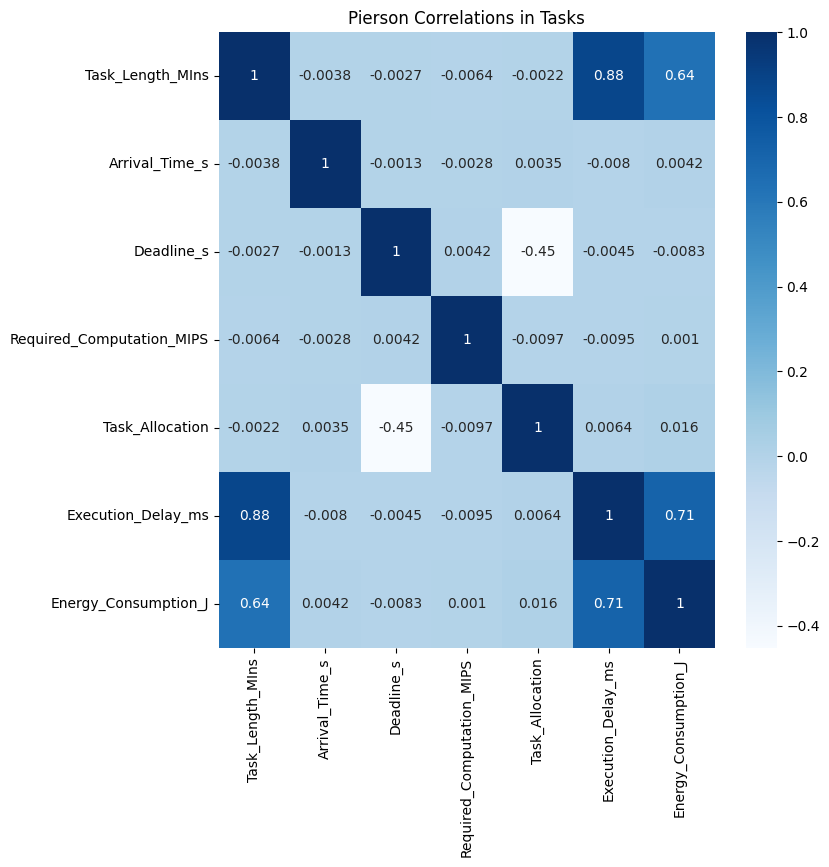

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(tasks.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Pierson Correlations in Tasks")
plt.show()

### Pierson Correlations in Nodes

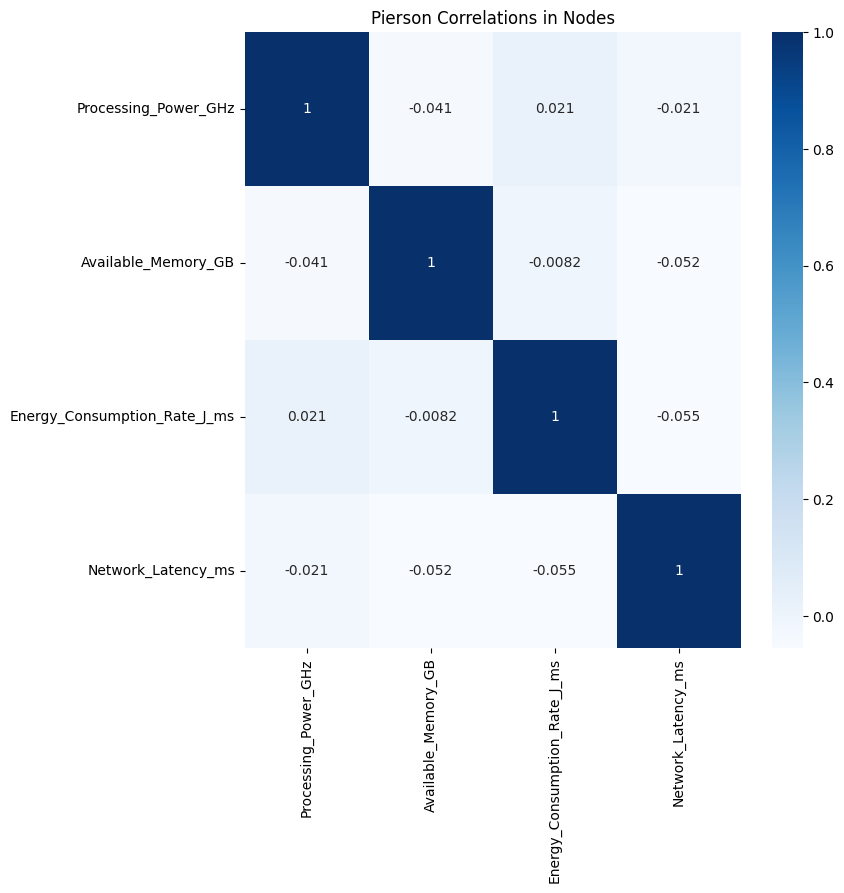

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(nodes.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Pierson Correlations in Nodes")
plt.show()

### Node Characteristics

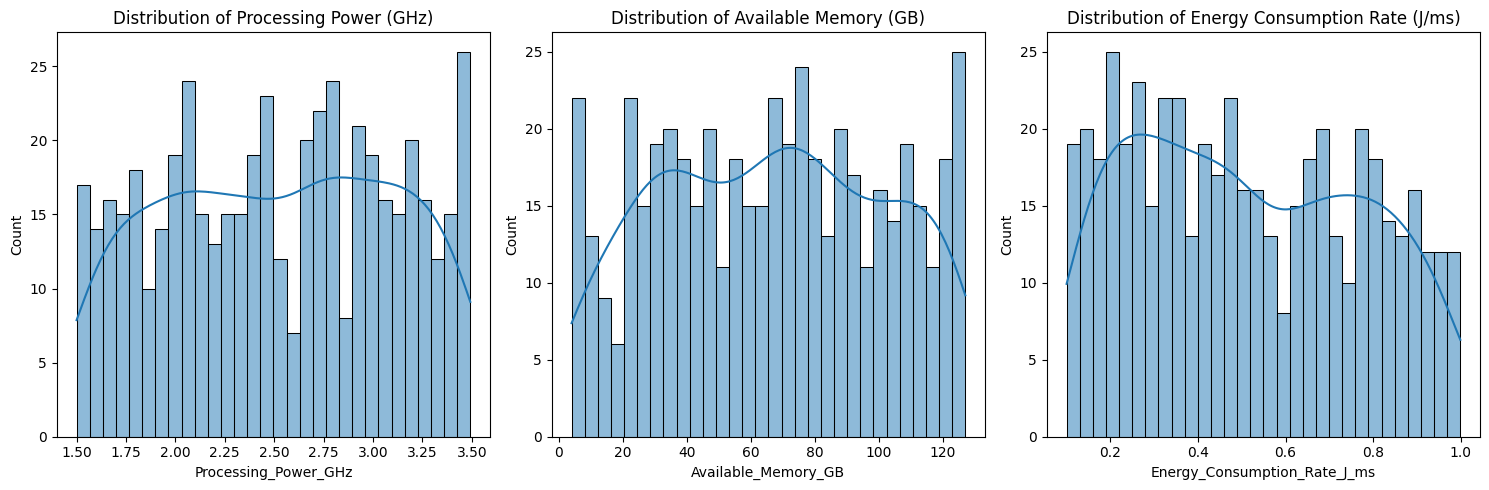

In [67]:
# Histograms for Fog Nodes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(nodes["Processing_Power_GHz"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Processing Power (GHz)")

sns.histplot(nodes["Available_Memory_GB"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Available Memory (GB)")

sns.histplot(nodes["Energy_Consumption_Rate_J_ms"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribution of Energy Consumption Rate (J/ms)")

plt.tight_layout()
plt.show()


### Execution Delay

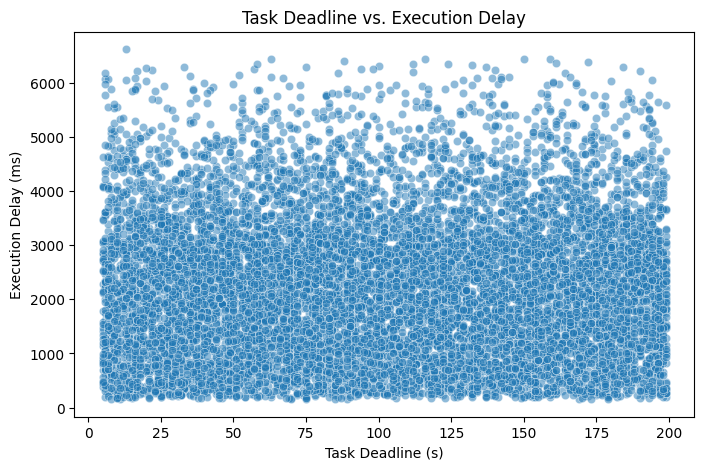

In [68]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tasks["Deadline_s"], y=tasks["Execution_Delay_ms"], alpha=0.5)
plt.xlabel("Task Deadline (s)")
plt.ylabel("Execution Delay (ms)")
plt.title("Task Deadline vs. Execution Delay")
plt.show()
